<a href="https://colab.research.google.com/github/sqbitegh/Colabs/blob/main/DataAnalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install toolz==0.12.0
#!pip install matplotlib==3.7.1

In [3]:
from typing import List, Callable, Tuple
from toolz import pipe, map, filter, partial, reduce, concat, take, drop
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px


In [4]:


def read_vectors(filepath: str, max_rows: int = None) -> List[List[float]]:
  """Reads a file containing newline-separated vectors and returns a list of vectors."""
  with open(filepath, 'r') as file:
      if max_rows is None:
        return [[float(num) for num in line.split()] for line in file if line.strip() and 'end' not in line]
      else:
        return [[float(num) for num in line.split()] for line in file if line.strip() and 'end' not in line][:max_rows]
    #return [[float(num) for num in line.split()] for line in file if line.strip()]

def map_vectors(func: Callable[[List[float]], List[float]], vectors: List[List[float]]) -> List[List[float]]:
  """Applies a function to each vector in the list."""
  return list(map(func, vectors))

def filter_vectors(predicate: Callable[[List[float]], bool], vectors: List[List[float]]) -> List[List[float]]:
  """Filters the list of vectors based on a predicate."""
  return list(filter(predicate, vectors))

def sort_vectors_by_column(vectors: List[List[float]], column_index: int, reverse: bool = False) -> List[List[float]]:
  """Sorts the list of vectors by a specific column."""
  return sorted(vectors, key=lambda vector: vector[column_index], reverse=reverse)

def zip_vectors(vectors1: List[List[float]], vectors2: List[List[float]]) -> List[Tuple[List[float], List[float]]]:
  """Zips two lists of vectors together."""
  return list(zip(vectors1, vectors2))

def concat_vectors(vectors1: List[List[float]], vectors2: List[List[float]]) -> List[List[float]]:
  """Concatenates two lists of vectors."""
  return list(concat([vectors1, vectors2]))

def cut_vectors(vectors: List[List[float]], start_index: int, end_index: int) -> List[List[float]]:
  """Cuts a list of vectors by index ranges."""
  return list(take(end_index, drop(start_index, vectors)))

def read_bool_vector(filepath: str) -> List[float]:
  """Reads a file containing newline-separated boolean strings (True/False)
  and converts them to a list of floats (1.0/0.0)."""
  with open(filepath, 'r') as file:
    return [1.0 if line.strip() == 'True' else 0.0 for line in file if 'end' not in line]

def add_dimension(vectors: List[List[float]], new_dimension: List[float]) -> List[List[float]]:
    """Adds a new dimension as the first element to each vector."""
    return [[new_val] + vec for new_val, vec in zip(new_dimension, vectors)]

def squeeze_columns(vectors: List[List[float]], c1: int, c2: int) -> List[List[float]]:
    """Squeezes columns from c1 to c2 (inclusive) into a single column by addition.
    Handles c1=0 correctly.
    """
    return list(map(lambda vector: ([sum(vector[c1:c2])] + vector[c2:]) if c1 == 0
                                  else (vector[:c1-1] + [sum(vector[c1-1:c2])] + vector[c2:]),
                   vectors))

def print_vector_info(vectors: List[List[float]]) -> None:
  """Prints the size and dimensions of the list of vectors."""
  num_vectors = len(vectors)
  if num_vectors > 0:
    vector_dim = len(vectors[0])
  else:
    vector_dim = 0  # Handle empty list case

  print(f"Number of vectors: {num_vectors}")
  print(f"Dimension of vectors: {vector_dim}")

  # Using NumPy for a more concise output
  if num_vectors > 0:
    print(f"Shape of vectors (NumPy): {np.array(vectors).shape}")



def visualize_output(output):
    """Visualizes the output matrix using matplotlib."""
    # Define numerical values for colors
    color_map = {
        1: 1,  # Blue
        2: 2,  # Yellow
        3: 3   # Red
    }

    # Convert output to a NumPy array with numerical values
    numerical_output = np.array([[color_map[val] for val in row] for row in output])

    # Create a custom colormap
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(['blue', 'yellow', 'red']) # Colors for values 1, 2, 3

    num_rows = numerical_output.shape[0]
    num_cols = numerical_output.shape[1]

    # Determine figure size based on the number of rows and columns
    # You might need to adjust the scaling factors (e.g., 0.5 and 0.1)
    # to get the desired visualization size.
    fig_width = num_cols * 0.02
    fig_height = num_rows * 0.01

    plt.figure(figsize=(fig_width, fig_height))

    # Display the numerical output using imshow with the custom colormap
    plt.imshow(numerical_output, aspect='auto', interpolation='nearest', cmap=cmap)
    plt.colorbar() # Add a colorbar to show the mapping
    plt.show()



def visualize_output2(output, columns, s_row=0, n_rows=None):
  """
  Visualizes the output based on specified columns using Plotly.

  Args:
    output: The output data (list of lists).
    columns: A list of column indices to visualize (length 2 for 2D, 3 for 3D).
  """
  if len(columns) < 2 or len(columns) > 3:
    print("Please provide either 2 or 3 column indices for visualization.")
    return

  # Convert output to a NumPy array for easier column access
  output_array = np.array(output)
  if n_rows is not None:
      output_array = output_array[s_row:n_rows]
  else:
      output_array = output_array[s_row:]

  if len(columns) == 2:
    x_col = columns[0]
    y_col = columns[1]
    if x_col >= output_array.shape[1] or y_col >= output_array.shape[1]:
      print("Invalid column index provided.")
      return

    fig = px.scatter(x=output_array[:, x_col], y=output_array[:, y_col],  width=300, height=300)
    fig.update_layout(
        xaxis_title=f"Column {x_col}",
        yaxis_title=f"Column {y_col}",
        title="2D Scatter Plot"
    )
    fig.show()

  elif len(columns) == 3:
    x_col = columns[0]
    y_col = columns[1]
    z_col = columns[2]
    if x_col >= output_array.shape[1] or y_col >= output_array.shape[1] or z_col >= output_array.shape[1]:
      print("Invalid column index provided.")
      return

    fig = px.scatter_3d(x=output_array[:, x_col], y=output_array[:, y_col], z=output_array[:, z_col], width=300, height=300)
    fig.update_layout(
        scene = dict(
            xaxis_title=f"Column {x_col}",
            yaxis_title=f"Column {y_col}",
            zaxis_title=f"Column {z_col}"),
        title="3D Scatter Plot"
    )
    fig.show()


In [5]:
def initialize_datavector(activations_filename, correctness_vals):
  vectors = read_vectors(activations_filename, None)  # Assuming vectors are stored in 'vectors.txt'
  if correctness_vals is None:
    bool_vector = [1.0] * len(vectors)
  else:
    bool_vector = read_bool_vector(correctness_vals)  # Assuming boolean strings are in 'bool_vector.txt'
  print_vector_info(vectors)
  #print(f"bool_vector {bool_vector}")
  # Add the boolean vector as the first dimension to the existing vectors
  merged_vectors = add_dimension(vectors, bool_vector) #if not equal length truncate to shorter
  print(f"merged_vectors {merged_vectors[:10]}")
  print_vector_info(merged_vectors)
  return merged_vectors

def process_vectors_EuclChart(merged_vectors,cols, s_row, n_rows):
  visualize_output2(merged_vectors, cols, s_row, n_rows)


def process_vectors(activations_filename, correctness_vals, sort_range, max_rows):
  vectors = read_vectors(activations_filename, max_rows)  # Assuming vectors are stored in 'vectors.txt'
  if correctness_vals is None:
    bool_vector = [1.0] * len(vectors)
  else:
    bool_vector = read_bool_vector(correctness_vals)  # Assuming boolean strings are in 'bool_vector.txt'
  print_vector_info(vectors)
  print(f"bool_vector {bool_vector}")

  # Add the boolean vector as the first dimension to the existing vectors
  merged_vectors = add_dimension(vectors, bool_vector)
  print(f"merged_vectors {merged_vectors}")
  print_vector_info(merged_vectors)
  #merged_vectors = squeeze_columns(merged_vectors, 1, 6)
  #merged_vectors = squeeze_columns(merged_vectors, 8, 11)
  print(f"merged_vectors squeezed {merged_vectors}")
  print_vector_info(merged_vectors)
  print("filterby first column")
  merged_vectors = filter_vectors(lambda vector: vector[0] == 1.0, merged_vectors)
  print_vector_info(merged_vectors)
  process_vectors2(merged_vectors, sort_range)

def process_vectors4(activations_filename, correctness_vals, sort_range, max_rows):
    datavector = initialize_datavector(activations_filename, correctness_vals)
    print_vector_info(datavector)

    squeeze_factor = 80
    squeezed_datavector = []
    for vector in datavector:
        new_vector = []
        for i in range(1, len(vector), squeeze_factor):
            new_vector.append(sum(vector[i:i+squeeze_factor]))
        # Add the first column (correctness value) back to the new vector
        squeezed_datavector.append([vector[0]] + new_vector)

    print_vector_info(squeezed_datavector)
    process_vectors2(squeezed_datavector, sort_range)

def process_vectors2(merged_vectors, sort_range):
  if sort_range is None:
    sorted_vectors = merged_vectors
    result = process_vectors3(sorted_vectors)
    print(f"output {result}")
    print_vector_info(result)
    visualize_output(result)
  else:
    for sort_column in sort_range:
      sorted_vectors = sort_vectors_by_column(merged_vectors, column_index=sort_column)
      result = process_vectors3(sorted_vectors)
      print(f"output {result}")
      print_vector_info(result)
      visualize_output(result)
  #sorted_vectors = merged_vectors
  #sorted_vectors = filter_vectors(lambda vector: vector[0] == 1.0, sorted_vectors)

  #print (f"sorted_vectors {sorted_vectors}")
  #print_vector_info(sorted_vectors)

def process_vectors3(sorted_vectors):
    # 2. Compare adjacent elements in each column and generate output
  output = []
  for i in range(len(sorted_vectors)):
    current_vector_output = []  # Output for the current vector
    # Skip the first row for comparison
    if i > 0:
      for j in range(1, len(sorted_vectors[i])):  # Start from the second column (index 1)
        if sorted_vectors[i][j] > sorted_vectors[i - 1][j]:
          current_vector_output.append(3)
        elif sorted_vectors[i][j] == sorted_vectors[i - 1][j]:
          current_vector_output.append(2)
        else:
          current_vector_output.append(1)
      output.append(current_vector_output)  # Append output for current vector to overall output
  return output






In [ ]:


process_vectors('activations_fc_input_d64_h1_epoch_4_test.txt', 'corrects_list_d64_h1_epoch_4_test.txt', range(1,32))
process_vectors('activations_fc_input_d64_h1_epoch_4_test.txt', 'corrects_list_d64_h1_epoch_4_test.txt', None)
#process_vectors('activations_fc_input_d64_h1_epoch_4_train.txt', 'corrects_list_d64_h1_epoch_4_train.txt', None)



In [ ]:
#from tinystories
process_vectors('sample_data/activations_rec4ep20_f10000.txt',None , None, 1000)
process_vectors('sample_data/activations_rec4ep20_f10000.txt',None , range(5, 12), 600)


#from tinystories, 2-3D

In [ ]:
datavector = initialize_datavector('sample_data/activations_rec6ep20_f10000.txt',None)
#datavector = initialize_datavector('sample_data/activations_rec4ep20_f10000.txt',None)


In [ ]:
process_vectors_EuclChart(datavector, [17 ,18], 700,800)


In [12]:
print("before sort")
print([row[:5] for row in datavector[0:10]])
sorted_vectors = sort_vectors_by_column(datavector[0:5000], column_index=10)
print("\n\n\nafter sort")
print([row[:5] for row in sorted_vectors[0:10]])
#sorted_vectors = datavector
for x_col in range(10, 11, 1):
    for y_col in range(x_col-4, x_col+10, 1):
      process_vectors_EuclChart(sorted_vectors, [x_col ,y_col], 1,80)
"""
for x_col in range(1, 20, 1):
    for y_col in range(x_col+1, x_col+2, 1):
      process_vectors_EuclChart(sorted_vectors, [x_col ,y_col], 10,100)
"""

before sort
[[1.0, 0.631901, -0.966119, 2.379652, -1.359957], [1.0, 0.409092, -0.46981, 2.164974, -0.733242], [1.0, 0.931788, 1.299255, 0.540022, 0.036133], [1.0, 1.147761, 1.046483, -0.307607, -1.355419], [1.0, 0.828717, 0.751746, -0.293386, -0.075902], [1.0, 0.038488, 0.708926, 1.121582, -0.252411], [1.0, 0.301063, 0.770318, -2.6146, 0.662424], [1.0, 1.656816, 2.165259, -0.429074, -0.021279], [1.0, 0.592183, 1.016776, 0.850076, -0.788869], [1.0, -0.8087, 0.513574, -0.292553, -0.597851]]



after sort
[[1.0, -1.076861, 0.977196, -0.359348, -0.634893], [1.0, 0.272509, 2.342266, 0.3808, 0.662677], [1.0, -0.917187, 0.593335, -1.530002, -0.69751], [1.0, 0.025003, 0.665604, -1.825385, -0.475622], [1.0, -0.119487, 1.377386, -1.904837, -1.233498], [1.0, -0.151327, 0.874984, -0.841938, -0.059347], [1.0, -0.388787, 0.059951, -1.576631, -1.096852], [1.0, -1.651622, -0.390166, -0.785764, 0.032869], [1.0, -0.984449, 0.410624, -1.149726, 1.421642], [1.0, -0.373631, -1.233699, 0.193707, -0.897166]]

'\nfor x_col in range(1, 20, 1):\n    for y_col in range(x_col+1, x_col+2, 1):\n      process_vectors_EuclChart(sorted_vectors, [x_col ,y_col], 10,100)\n'

Phi2

In [ ]:

process_vectors('sample_data/activations_phi2_factor_c.txt',None , range(1, 12), 1000)


In [6]:
datavector = initialize_datavector('sample_data/activations_phi2_factor_c.txt',None)


Number of vectors: 88
Dimension of vectors: 2560
Shape of vectors (NumPy): (88, 2560)
merged_vectors [[1.0, 0.631901, -0.966119, 2.379652, -1.359957, -0.58467, -1.245516, -1.640956, -0.918885, -0.077145, 0.612034, 1.037214, -0.843456, -0.080726, -0.514547, -0.134276, 0.145693, -0.27541, 0.228379, 0.235654, 0.248926, -1.306878, 0.704902, -0.504121, 0.701426, 0.372859, -0.618338, -0.376745, 0.091936, 0.737474, 0.335289, -0.728669, 0.058904, 0.156002, 0.302485, -0.271629, -1.52316, -1.154972, 0.161239, -2.347925, 0.325461, -0.204233, 0.184941, -1.006778, 0.22621, 1.300357, -0.331166, 1.09728, 0.192277, -1.31778, -0.025857, 0.054823, -0.97588, 1.628421, 0.791927, -0.021567, -1.52368, 0.728643, -1.256315, -0.317028, 0.269329, 0.165162, -0.489785, -0.592472, -0.471785, 0.822666, 1.312595, -0.728481, 0.111731, 0.261582, 0.025789, -1.944103, -1.165802, 1.230885, -1.041069, 1.536053, 1.927241, 0.145153, 0.239307, 1.004875, -0.984616, -0.369974, 0.534597, -0.88551, -0.750385, -0.253589, 0.736019

Number of vectors: 89
Dimension of vectors: 2560
Shape of vectors (NumPy): (89, 2560)
merged_vectors [[1.0, 0.631901, -0.966119, 2.379652, -1.359957, -0.58467, -1.245516, -1.640956, -0.918885, -0.077145, 0.612034, 1.037214, -0.843456, -0.080726, -0.514547, -0.134276, 0.145693, -0.27541, 0.228379, 0.235654, 0.248926, -1.306878, 0.704902, -0.504121, 0.701426, 0.372859, -0.618338, -0.376745, 0.091936, 0.737474, 0.335289, -0.728669, 0.058904, 0.156002, 0.302485, -0.271629, -1.52316, -1.154972, 0.161239, -2.347925, 0.325461, -0.204233, 0.184941, -1.006778, 0.22621, 1.300357, -0.331166, 1.09728, 0.192277, -1.31778, -0.025857, 0.054823, -0.97588, 1.628421, 0.791927, -0.021567, -1.52368, 0.728643, -1.256315, -0.317028, 0.269329, 0.165162, -0.489785, -0.592472, -0.471785, 0.822666, 1.312595, -0.728481, 0.111731, 0.261582, 0.025789, -1.944103, -1.165802, 1.230885, -1.041069, 1.536053, 1.927241, 0.145153, 0.239307, 1.004875, -0.984616, -0.369974, 0.534597, -0.88551, -0.750385, -0.253589, 0.736019

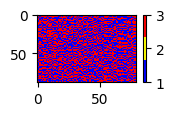

output [[3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 3, 1], [3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3], [1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3], [1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1], [3, 3, 1, 3, 3, 3, 3, 1,

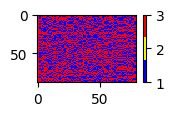

output [[3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3], [3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1], [1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3], [3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1], [1, 1, 3, 3, 3, 1, 1, 1,

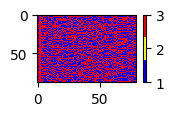

output [[1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3], [3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3], [1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3], [1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3], [3, 3, 1, 3, 1, 3, 1, 1,

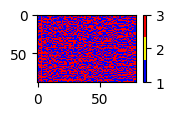

output [[3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3], [1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3], [1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1], [1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1], [1, 3, 1, 3, 3, 1, 1, 1,

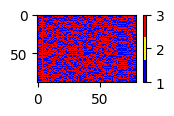

output [[3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1], [1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3], [1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1], [1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1], [3, 3, 3, 3, 3, 3, 3, 1,

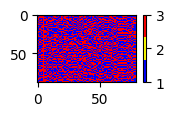

output [[1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3], [3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3], [3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1], [3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3], [1, 3, 1, 1, 3, 3, 3, 3,

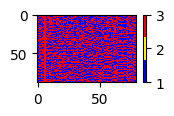

output [[3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3], [3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3], [1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1], [1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1], [1, 1, 1, 3, 1, 3, 1, 3,

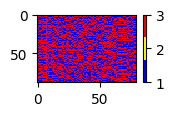

output [[3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3], [3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1], [1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1], [3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3], [1, 1, 1, 3, 1, 1, 1, 1,

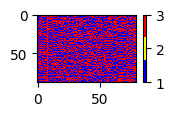

In [7]:
process_vectors4('sample_data/activations_phi2_factor_php.txt',None , range(1, 10), 1000)

In [8]:
process_vectors_EuclChart(datavector, [8 ,9], 0,800)

Tests

In [ ]:
#test
process_vectors('example_vectors.txt', 'example_bool_vector.txt', None)
process_vectors('example_vectors.txt', 'example_bool_vector.txt', range(1,3))


In [ ]:
# Example Usage
vectors = read_vectors('example_vectors.txt')  # Assuming vectors are stored in 'vectors.txt'

# Map: Double each element in each vector
doubled_vectors = map_vectors(lambda vector: [x * 2 for x in vector], vectors)

# Filter: Keep vectors where the first element is positive
positive_vectors = filter_vectors(lambda vector: vector[0] > 0, vectors)

# Sort: Sort vectors by the second column in descending order
sorted_vectors = sort_vectors_by_column(vectors, column_index=1, reverse=True)

# Zip: Combine two lists of vectors
zipped_vectors = zip_vectors(vectors, doubled_vectors)

# Concat: Concatenate two lists of vectors
concatenated_vectors = concat_vectors(vectors, doubled_vectors)

# Cut: Get vectors from index 2 to 5
cut_vectors_result = cut_vectors(vectors, start_index=2, end_index=5)

